   # Material abbreviations
   The sampling name (abbreviations) is chaninging among the excel and file sheet, so in order to have a standardize naming, a dictionary is made.
   The steps will be:
   1. Simple statstics and graphs to get all the different sampling types
   2. Make a dictionary for different naming (Classification)
   3. Identify all the abbreviations not connected to 'Unknown' classification

import Packages 

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

## A. Check all the material within DF

### 1. import DF that have all the sample names

In [68]:
material = '/Users/MiladM-Dev/Documents/1PhD/Dataset_trials/B3_mimic/material.csv'
material = pd.read_csv(material, encoding='utf-8', sep=';')
material = material.iloc[:,[0]]
material

,Material
0,Rachenabstrich
1,Rachenabstrich
2,oral fluid
3,Rachenabstrich
4,Urin
...,...
4265,oral fluid
4266,oral fluid
4267,Urin
4268,oral fluid


### 2. Counting the common sampling names

As different names could still belong to the same classification

In [69]:
df2 = material.pivot_table(index = ['Material'], aggfunc ='size')
df2 = df2.to_frame(name='amount').reset_index()
df2 = df2.sort_values('amount', ascending=False)
df2

,Material,amount
23,Rachenabstrich,1738
50,oral fluid,954
33,Urin,674
15,RNA,155
45,cDNA,148
0,Abstrich,93
25,Rachenabstrich in Flüssigkeit,90
13,PCR-Produkt,67
22,RNA aus Rachenabstrich,63
12,Nasenabstrich,31


### 3. Pie chart

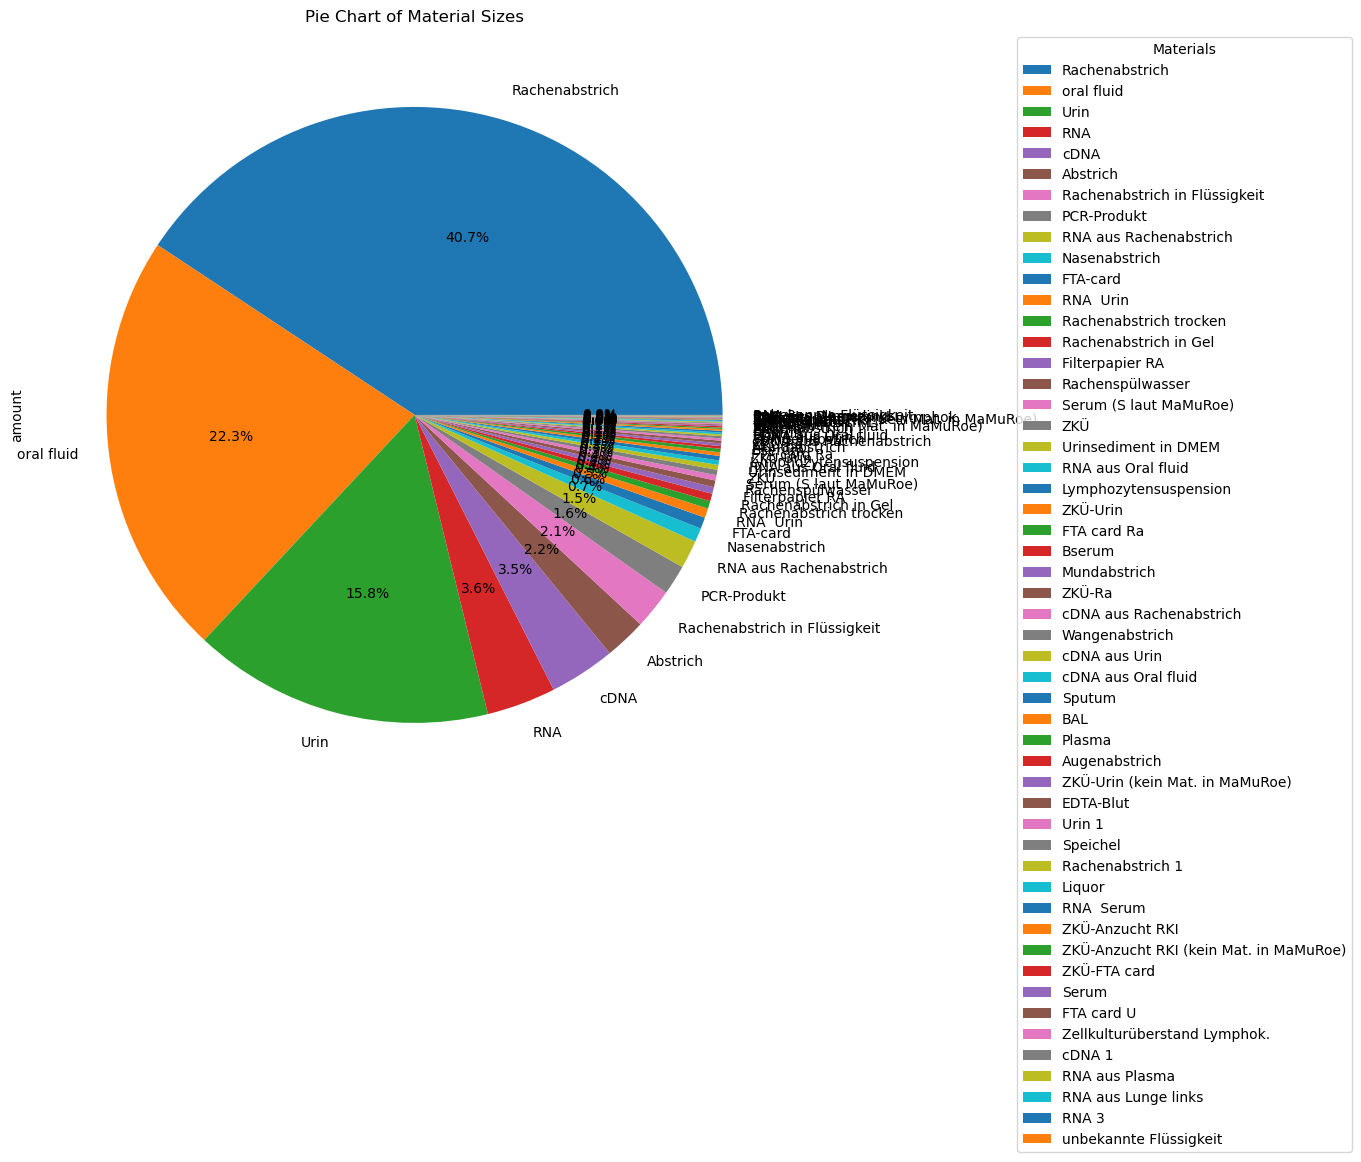

In [ ]:
ax = df2.plot.pie(
    y='amount', autopct='%1.1f%%', legend=True, labels=df2['Material'], figsize=(15, 10))
plt.title('Pie Chart of Material Sizes')

# Adding legend manually
plt.legend(
    labels=df2['Material'],
    loc='upper center',
    bbox_to_anchor=(1.5, 1),  # Positioning the legend next to the chart
    title="Materials",
)
plt.title('Pie Chart of Material Sizes')

# Show the plots
plt.show()


### 4. Histogram

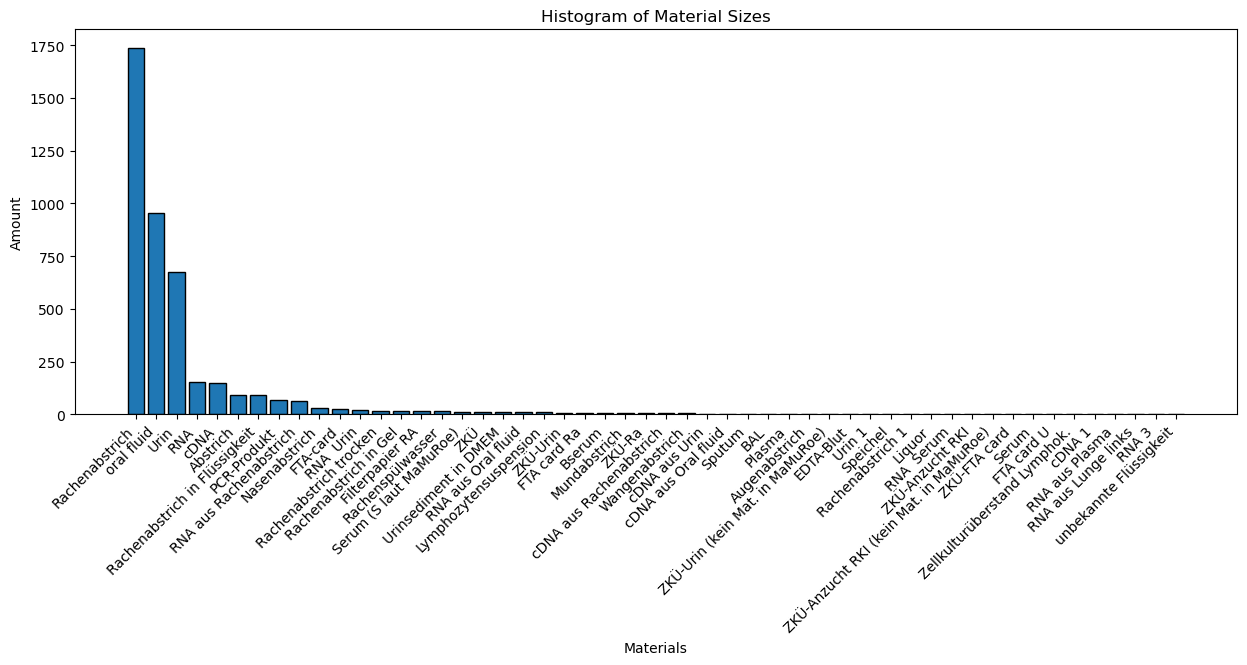

In [71]:
# Plotting a histogram
fig, ax = plt.subplots(figsize=(15, 5))

# Create histogram with 'amount' as the values, and bins for different 'Material' categories
ax.bar( df2['Material'], df2['amount'], edgecolor='black')

# Setting title and labels
plt.title('Histogram of Material Sizes')
plt.xlabel('Materials')
plt.ylabel('Amount')

# Adding x-tick labels for 'Material'
ax.set_xticks(range(len(df2['Material'].unique())))
ax.set_xticklabels(df2['Material'], rotation=45, ha='right')

# Show the plot
plt.show()


## B. Dictionary to classify different abbreviations or naming 
In order to standarize the naming in the dataset

### 1. Dictionary

In [ ]:
material_dict = {
    "Rachenabstrich": ["Rachenabstrich", 'Rsp', "RA", "Ra",'Rachenabstrich 1', 'ZKÜ-Ra','FTA card Ra', 'Rachenabstrich in Gel','cDNA aus Rachenabstrich','Rachenabstrich trocken', 'Filterpapier RA', 'RNA aus Rachenabstrich','Rachenabstrich in Flüssigkeit'] ,

    "Urine": ["Urine", "Urin", "Urin 1", 'ZKÜ-Urin (kein Mat. in MaMuRoe)','ZKÜ-Urin', 'cDNA aus Urin', 'Urinsediment in DMEM', 'RNA Urin'],

    'Serum': ['Serum', 'RNA Serum', 'Bserum', 'Serum (S laut MaMuRoe)'],

    'Plasma': ['RNA aus Plasma', 'Plasma'],

    'Oral Fluid': ['OF', 'oral fluid', 'cDNA aus Oral fluid', 'RNA aus Oral fluid']
}
df_materil_dict = pd.DataFrame(list(material_dict.items()), columns=['Material', 'Material Variants'])

df_materil_dict
#df_materil_dict.to_csv('/Users/MiladM-Dev/Documents/1PhD/meetings/Board Meeting/df_materil_dict.csv', index=False)

### 2. New column with classification name

In [93]:
def map_to_key(description):
    for key, values in material_dict.items():
        if any(value in description for value in values):
            return key
    return 'Unknown'  # Default value if no match is found

df2['Material dict'] = df2['Material'].apply(map_to_key)

df2

,Material,amount,Material dict
23,Rachenabstrich,1738,Rachenabstrich
50,oral fluid,954,Oral Fluid
33,Urin,674,Urine
15,RNA,155,Unknown
45,cDNA,148,Unknown
0,Abstrich,93,Unknown
25,Rachenabstrich in Flüssigkeit,90,Rachenabstrich
13,PCR-Produkt,67,Unknown
22,RNA aus Rachenabstrich,63,Rachenabstrich
12,Nasenabstrich,31,Unknown


### 3. Count the classes

In [94]:
df2_summary = df2.groupby('Material dict')['amount'].sum().reset_index()
df2_summary


,Material dict,amount
0,Oral Fluid,968
1,Plasma,4
2,Rachenabstrich,1976
3,Serum,21
4,Unknown,579
5,Urine,722


### 4. Pie Chart

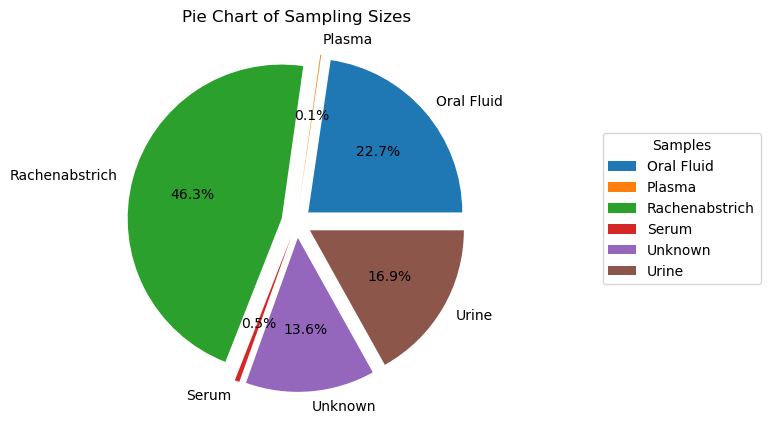

In [137]:
# Assuming df2_summary is your DataFrame and explode1 is defined
explode1 = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

# Plot the pie chart
ax = df2_summary.plot.pie(
    y='amount', 
    explode=explode1,
    autopct='%1.1f%%', 
    legend=True, 
    labels=df2_summary['Material dict'], 
    figsize=(5, 5)
)

plt.title('Pie Chart of Sampling Sizes')

ax.set_ylabel('')

plt.legend(
    labels=df2_summary['Material dict'],
    loc='upper center',
    bbox_to_anchor=(1.5, 0.75),  
    title="Samples"
)

# Show the plot
plt.show()


### 5, Check the unkowns

In [95]:
unknown_material = unknown_materials = df2[df2['Material dict'] == 'Unknown']
unknown_material

,Material,amount,Material dict
15,RNA,155,Unknown
45,cDNA,148,Unknown
0,Abstrich,93,Unknown
13,PCR-Produkt,67,Unknown
12,Nasenabstrich,31,Unknown
7,FTA-card,26,Unknown
37,ZKÜ,12,Unknown
10,Lymphozytensuspension,10,Unknown
11,Mundabstrich,6,Unknown
36,Wangenabstrich,5,Unknown
